In [1]:
"""
Constant-pressure, adiabatic kinetics simulation.

Requires: cantera >= 2.5.0, matplotlib >= 2.0
"""

import sys
import os
import numpy   as np

import matplotlib.pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

import cantera as ct

In [2]:
gas      = ct.Solution('gri30.cti')
gas.TPX  = 1250, ct.one_atm, 'CH4:0.5, O2:1, N2:3.76'

T0       = 900
gas.TPX  = T0, ct.one_atm, 'CH4:0.5, O2:1, N2:3.76'
r        = ct.IdealGasReactor(gas)
Y0       = gas.Y

sim     = ct.ReactorNet([r])
sim.verbose = False

# limit advance when temperature difference is exceeded
#delta_T_max = 0.01
#r.set_advance_limit('temperature', delta_T_max)

tMin     = 1.e0
tMax     = 1e1
dt0      = 1.e-4
tStratch = 1.01
tVec     = [0.0]
t        = tMin
dt       = dt0
while (t <= tMax):
    tVec.append(t)
    t  =   t + dt
    dt = dt0 * tStratch

gas_         = gas
states       = ct.SolutionArray(gas, extra=['t'])
current_time = 0.0
time         = []
temperature  = []
mfrac        = []
HR           = []
for t in tVec[1:]:
    current_time = t
    sim.advance(current_time)
    time.append(current_time)
    temperature.append(r.T)
    mfrac.append(r.thermo.Y)
    HR.append(- np.dot(gas.net_production_rates, gas.partial_molar_enthalpies))
    #states.append(r.thermo.state, t=sim.time)
    #dydt = ReactorOde_CVODE(sim.time, np.concatenate(([r.T], r.thermo.Y), axis=0))

auto_ignition = time[HR.index(max(HR))]
Y             = np.vstack(mfrac)

print('Auto Ignition Delay = ', auto_ignition)

Auto Ignition Delay =  7.055251999994408


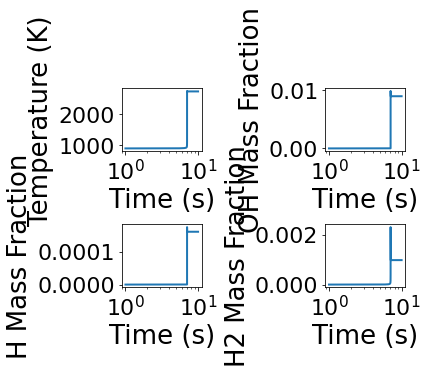

In [3]:
plt.clf()
plt.subplot(2, 2, 1)
plt.plot(time, temperature)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.xscale('log')
plt.subplot(2, 2, 2)
plt.plot(time, Y[:, gas.species_index('OH')])
plt.xlabel('Time (s)')
plt.ylabel('OH Mass Fraction')
plt.xscale('log')
plt.subplot(2, 2, 3)
plt.plot(time, Y[:, gas.species_index('H')])
plt.xlabel('Time (s)')
plt.ylabel('H Mass Fraction')
plt.xscale('log')
plt.subplot(2, 2, 4)
plt.plot(time, Y[:, gas.species_index('H2')])
plt.xlabel('Time (s)')
plt.ylabel('H2 Mass Fraction')
plt.xscale('log')
plt.tight_layout()
plt.show()

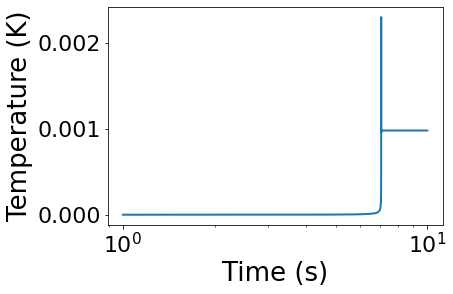

In [4]:
plt.plot(time, Y[:, gas.species_index('H2')])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.xscale('log')
#plt.xlim([1.e-6, 1.e-2])

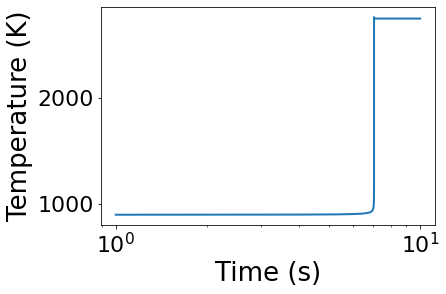

In [5]:
plt.plot(time, temperature)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.xscale('log')
#plt.xlim([1.e-6, 1.e-2])

In [6]:
temperature[0]

900.0925799021808

In [7]:
temperature[-1]

2740.69390157848